In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [28]:
data=pd.read_csv('C:\\Users\\hanfe\\Desktop\\数据练习\\CDNOW_master.txt',sep='\s+')
data.head()

,customer_id,date,number_of_cds,dollar_value
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    69659 non-null  int64  
 1   date           69659 non-null  int64  
 2   number_of_cds  69659 non-null  int64  
 3   dollar_value   69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [29]:
data['order_dt']=pd.to_datetime(data['date'],format='%Y%m%d')
#pd.to_datetime %Y 代表4位年， %m 代表两位的月份， %d 代表两位的日  %y 代表两位的年份
# %h代表两位的小时  %M 代表的分钟 %s 代表秒

In [49]:
data['dt_month']=data['order_dt'].astype('datetime64[M]')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    69659 non-null  int64         
 1   date           69659 non-null  int64         
 2   number_of_cds  69659 non-null  int64         
 3   dollar_value   69659 non-null  float64       
 4   order_dt       69659 non-null  datetime64[ns]
 5   year           69659 non-null  int64         
 6   month          69659 non-null  int64         
 7   day            69659 non-null  int64         
 8   dt_month       69659 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(6)
memory usage: 4.8 MB


In [50]:
data.head()

,customer_id,date,number_of_cds,dollar_value,order_dt,year,month,day,dt_month
0,1,19970101,1,11.77,1997-01-01,1997,1,1,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997,1,12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997,1,12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997,1,2,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997,3,30,1997-03-01


In [32]:
data['year']=data.order_dt.map(lambda x:x.year)

In [33]:
data['month']=data.order_dt.dt.month

In [34]:
data['day']=data.order_dt.dt.day

In [35]:
data.tail()

,customer_id,date,number_of_cds,dollar_value,order_dt,year,month,day
69654,23568,19970405,4,83.74,1997-04-05,1997,4,5
69655,23568,19970422,1,14.99,1997-04-22,1997,4,22
69656,23569,19970325,2,25.74,1997-03-25,1997,3,25
69657,23570,19970325,3,51.12,1997-03-25,1997,3,25
69658,23570,19970326,2,42.96,1997-03-26,1997,3,26


In [36]:
data.describe()

,customer_id,date,number_of_cds,dollar_value,year,month,day
count,69659.000000,6.965900e+04,69659.000000,69659.000000,69659.000000,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648,1997.183135,4.365308,15.461505
std,6819.904848,3.837735e+03,2.333924,36.281942,0.386780,3.148289,8.645357
min,1.000000,1.997010e+07,1.000000,0.000000,1997.000000,1.000000,1.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000,1997.000000,2.000000,8.000000
50%,11410.000000,1.997042e+07,2.000000,25.980000,1997.000000,3.000000,15.000000
75%,17273.000000,1.997111e+07,3.000000,43.700000,1997.000000,6.000000,23.000000
max,23570.000000,1.998063e+07,99.000000,1286.010000,1998.000000,12.000000,31.000000


In [37]:
data.isnull().sum()

customer_id      0
date             0
number_of_cds    0
dollar_value     0
order_dt         0
year             0
month            0
day              0
dtype: int64

In [38]:
data.year.unique()

array([1997, 1998], dtype=int64)

<AxesSubplot:xlabel='dt_month'>

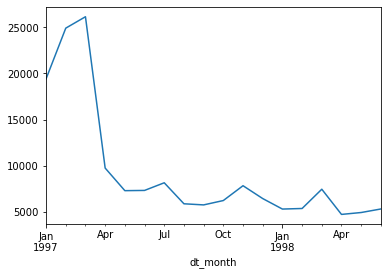

In [55]:
data.groupby('dt_month')['number_of_cds'].sum().plot()

Text(0.5, 1.0, 'Customers Count')

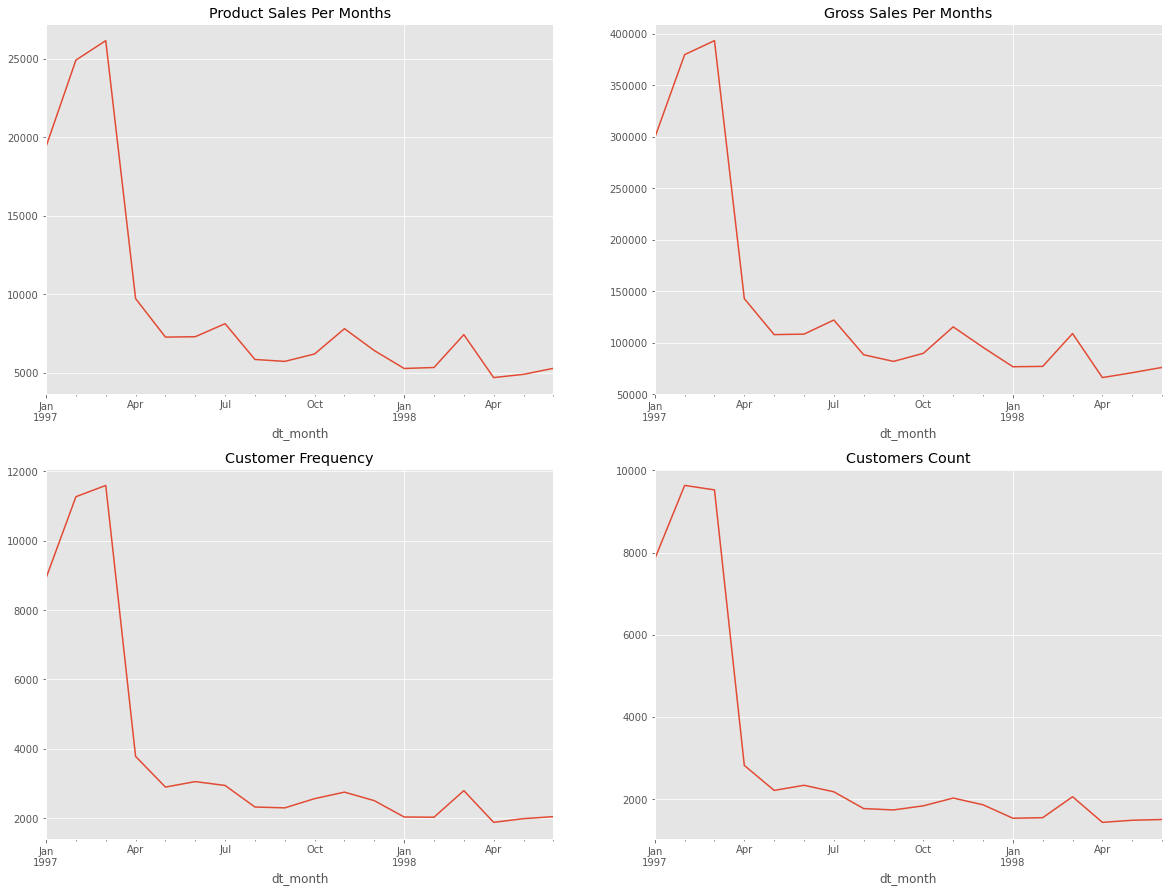

In [65]:

plt.figure(figsize=(20,15))
#monthly product sales
plt.subplot(221)
data.groupby('dt_month')['number_of_cds'].sum().plot()
plt.title(np.char.title('product sales per months'))
#monthly sales amont
plt.subplot(222)
data.groupby('dt_month')['dollar_value'].sum().plot()
plt.title(np.char.title('gross sales per months'))

#monthly customer consumtion frequency
plt.subplot(223)
data.groupby('dt_month')['customer_id'].count().plot()
plt.title(np.char.title('customer frequency'))

#monthly customers counts
plt.subplot(224)
data.groupby('dt_month')['customer_id'].nunique().plot()
plt.title(np.char.title('customers count'))


In [66]:
data.groupby('dt_month')['customer_id'].nunique()

dt_month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: customer_id, dtype: int64

In [67]:
data.groupby('dt_month')['customer_id'].count()

dt_month
1997-01-01     8928
1997-02-01    11272
1997-03-01    11598
1997-04-01     3781
1997-05-01     2895
1997-06-01     3054
1997-07-01     2942
1997-08-01     2320
1997-09-01     2296
1997-10-01     2562
1997-11-01     2750
1997-12-01     2504
1998-01-01     2032
1998-02-01     2026
1998-03-01     2793
1998-04-01     1878
1998-05-01     1985
1998-06-01     2043
Name: customer_id, dtype: int64

In [71]:
data.groupby('dt_month')['customer_id'].apply(lambda x: len(x.drop_duplicates()))

dt_month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: customer_id, dtype: int64

In [72]:
data.groupby('customer_id').sum()

,date,number_of_cds,dollar_value,year,month,day
customer_id,,,,,,
1,19970101,1,11.77,1997,1,1
2,39940224,6,89.00,3994,2,24
3,119833602,16,156.46,11983,35,102
4,79882233,7,100.50,7988,22,33
5,219686137,29,385.61,21968,60,137
...,...,...,...,...,...,...
23566,19970325,2,36.00,1997,3,25
23567,19970325,1,20.97,1997,3,25
23568,59911152,6,121.70,5991,11,52


In [73]:
data.groupby('customer_id').sum().describe()

,date,number_of_cds,dollar_value,year,month,day
count,2.357000e+04,23570.000000,23570.000000,23570.000000,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426,5902.493848,12.901273,45.695078
std,9.460684e+07,16.983531,240.925195,9460.395707,28.710688,77.025514
min,1.997010e+07,1.000000,0.000000,1997.000000,1.000000,1.000000
25%,1.997021e+07,1.000000,19.970000,1997.000000,2.000000,13.000000
50%,1.997032e+07,3.000000,43.395000,1997.000000,3.000000,25.000000
75%,5.992125e+07,7.000000,106.475000,5992.000000,14.000000,51.000000
max,4.334408e+09,1033.000000,13990.930000,433427.000000,1350.000000,3388.000000


In [77]:
x=data.groupby('customer_id')['number_of_cds'].sum()
x

In [77]:
y=data.groupby('customer_id')['dollar_value'].sum()
y

customer_id
1         11.77
2         89.00
3        156.46
4        100.50
5        385.61
          ...  
23566     36.00
23567     20.97
23568    121.70
23569     25.74
23570     94.08
Name: dollar_value, Length: 23570, dtype: float64

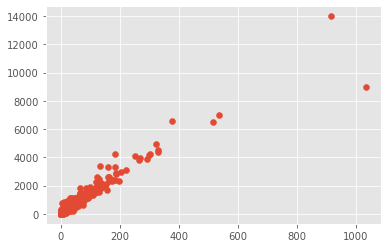

In [78]:
plt.scatter(x,y)

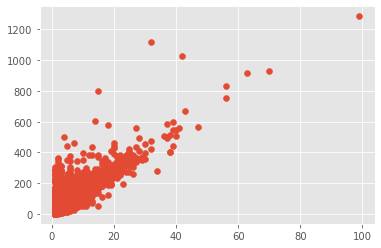

In [80]:
plt.scatter(data.number_of_cds,data.dollar_value)

In [81]:
average_cd_price=data.dollar_value/data.number_of_cds

In [82]:
average_cd_price

0        11.770
1        12.000
2        15.400
3        10.380
4        10.380
          ...  
69654    20.935
69655    14.990
69656    12.870
69657    17.040
69658    21.480
Length: 69659, dtype: float64

In [84]:
average_cd_price.describe()

count    69659.000000
mean        15.459447
std          8.735528
min          0.000000
25%         12.270000
50%         13.990000
75%         15.490000
max        305.990000
dtype: float64

<AxesSubplot:xlabel='how many cd purchased by per customer', ylabel='Frequency'>

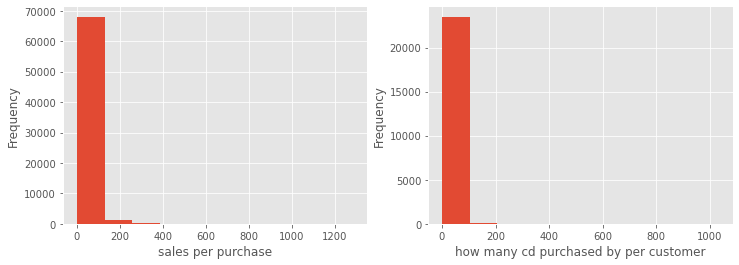

In [89]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.xlabel('sales per purchase')
data['dollar_value'].plot(kind='hist',bins=10)

plt.subplot(122)
plt.xlabel('how many cd purchased by per customer')
data.groupby('customer_id')['number_of_cds'].sum().plot(kind='hist',bins=10)

In [93]:
user_cumsum=data.groupby('customer_id')['dollar_value'].sum().sort_values().reset_index()
user_cumsum

,customer_id,dollar_value
0,10175,0.00
1,4559,0.00
2,1948,0.00
3,925,0.00
4,10798,0.00
...,...,...
23565,7931,6497.18
23566,19339,6552.70
23567,7983,6973.07
23568,14048,8976.33


In [106]:
user_cumsum.dollar_value[-500:].sum()/user_cumsum.dollar_value.sum()

0.23759837472999362

In [103]:
user_cumsum.dollar_value[-5000:].sum()

1731808.7200000002

In [108]:
user_cumsum['amount_cumsum']=user_cumsum['dollar_value'].cumsum()
user_cumsum.tail()


,customer_id,dollar_value,amount_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


In [109]:
amount_total=user_cumsum.amount_cumsum.max()
amount_total

2500315.6300000004

In [112]:
user_cumsum['prop']=user_cumsum.apply(lambda x:x['amount_cumsum']/amount_total,axis=1)

In [134]:
user_cumsum.iloc[20000:20001,3:4]

,prop
20000,0.391886


Text(20500, 0.391886, '0.391886')

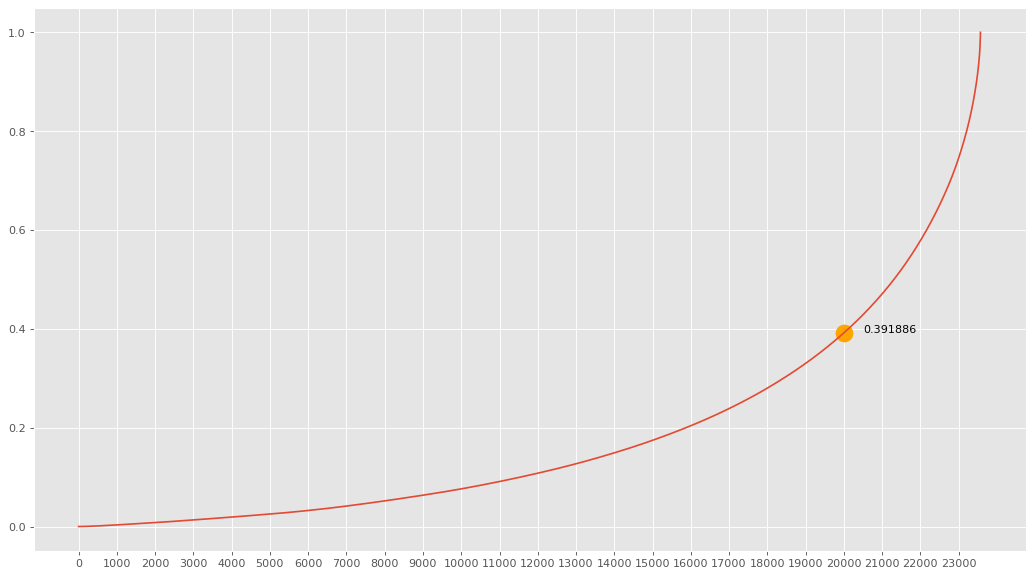

In [141]:
plt.figure(figsize=(16,9),dpi=80)
user_cumsum['prop'].plot()
plt.xticks(np.arange(0,23569,1000))
plt.scatter(20000,0.391886,linewidth=10,color='orange')
plt.text(20000+500,0.391886,0.391886)


## custom purchase behavior analysis

### first purchasing time

<AxesSubplot:>

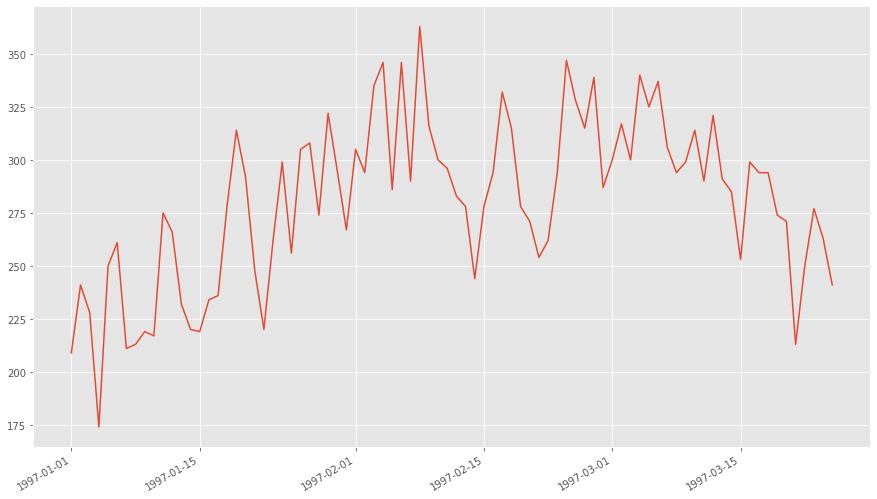

In [147]:
plt.figure(figsize=(15,9))
data.groupby('customer_id')['order_dt'].min().value_counts().plot()

## last time purchasing

<AxesSubplot:>

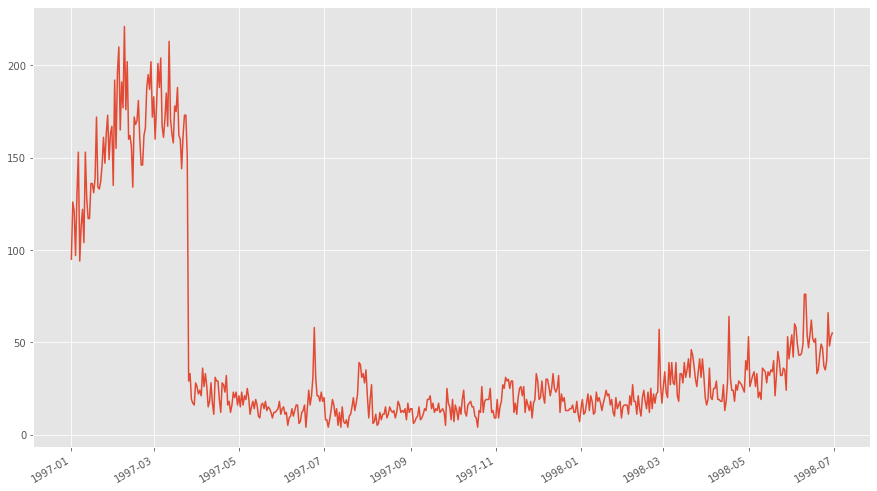

In [149]:
plt.figure(figsize=(15,9))
data.groupby('customer_id')['order_dt'].max().value_counts().plot()
# during the fires three month, we lacked of loyal customers. But given more time, we have more customers get used to our online platform.
# we can see a siginificant decrese in customer churn. 

## cumtomer RFM system

 ###1.customer categorizing

In [151]:
rfm=data.pivot_table(index='customer_id'
                     ,values=['dollar_value','number_of_cds','order_dt']
                     ,aggfunc={
                         'order_dt':'max',
                         'number_of_cds':'sum',
                         'dollar_value':'sum'
                         })
rfm

,dollar_value,number_of_cds,order_dt
customer_id,,,
1,11.77,1,1997-01-01
2,89.00,6,1997-01-12
3,156.46,16,1998-05-28
4,100.50,7,1997-12-12
5,385.61,29,1998-01-03
...,...,...,...
23566,36.00,2,1997-03-25
23567,20.97,1,1997-03-25
23568,121.70,6,1997-04-22


In [155]:
rfm['R']=-(rfm.order_dt-rfm.order_dt.max())/np.timedelta64(1,'D')
#np.timedelta64(1,'D') 取相差的天数，保留一位小数
rfm.rename(columns={'number_of_cds':'F','dollar_value':'M'},inplace=True)

In [156]:
rfm.head()

,M,F,order_dt,R
customer_id,,,,
1,11.77,1,1997-01-01,545.0
2,89.00,6,1997-01-12,534.0
3,156.46,16,1998-05-28,33.0
4,100.50,7,1997-12-12,200.0
5,385.61,29,1998-01-03,178.0


In [163]:
rfm['F(fixed)']=data.groupby('customer_id').count()['date'].values


In [164]:
rfm.head()

,M,F,order_dt,R,F(fixed)
customer_id,,,,,
1,11.77,1,1997-01-01,545.0,1
2,89.00,6,1997-01-12,534.0,2
3,156.46,16,1998-05-28,33.0,6
4,100.50,7,1997-12-12,200.0,4
5,385.61,29,1998-01-03,178.0,11


In [167]:
rfm['F(fixed)'].sort_values(ascending=False)[:50]

customer_id
14048    217
7592     201
7983     149
22061    143
3049     117
499      110
19597    109
7145     102
2484      80
10079     67
4459      65
7931      62
710       61
12367     60
17104     58
19339     56
6057      55
1722      52
8035      52
13167     50
1077      49
20917     49
20873     49
22013     48
1760      47
12476     47
15562     46
398       44
6569      42
9177      42
20111     42
12860     42
9908      42
4995      41
3901      41
5868      40
1965      40
15026     39
1794      39
3416      38
22815     38
1980      37
619       36
4159      36
4518      36
8956      35
8250      35
3501      35
20316     35
16517     35
Name: F(fixed), dtype: int64

### Rfm计算方式 每一列的数据减去本列的平均值，平均值可正可负，结果值与1作比较 如果》=1 则设置为1，否则为0 

In [179]:
def rfm_func(x):
    level=x.apply(lambda x: '1' if x>=1 else '0')
    label=level['R']+level['F(fixed)']+level['M'] #据说有三位字符的字符串
    customer_cat={
        '111':"Most valuable customers",
        '011':'Important maintaining customers',
        '101':'Important developing customers',
        '001':'Important retention customers',
        '110':'ordinary valuable custoemrs',
        '010':'ordinary maintaining customers',
        '100':'ordinary developing customers',
        '000':'Most likely to churn'
    }
    result=customer_cat[label]
    return result
    
rfm['label']=rfm[['R','F(fixed)','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfm.head(10)


,M,F,order_dt,R,F(fixed),label
customer_id,,,,,,
1,11.77,1,1997-01-01,545.0,1,ordinary developing customers
2,89.00,6,1997-01-12,534.0,2,ordinary developing customers
3,156.46,16,1998-05-28,33.0,6,Important maintaining customers
4,100.50,7,1997-12-12,200.0,4,ordinary maintaining customers
5,385.61,29,1998-01-03,178.0,11,Important maintaining customers
6,20.99,1,1997-01-01,545.0,1,ordinary developing customers
7,264.67,18,1998-03-22,100.0,3,Important retention customers
8,197.66,18,1998-03-29,93.0,8,Important maintaining customers
9,95.85,6,1998-06-08,22.0,3,Most likely to churn


In [172]:
rfm.R-rfm.R.mean()

customer_id
1        177.778362
2        166.778362
3       -334.221638
4       -167.221638
5       -189.221638
            ...    
23566     94.778362
23567     94.778362
23568     66.778362
23569     94.778362
23570     93.778362
Name: R, Length: 23570, dtype: float64

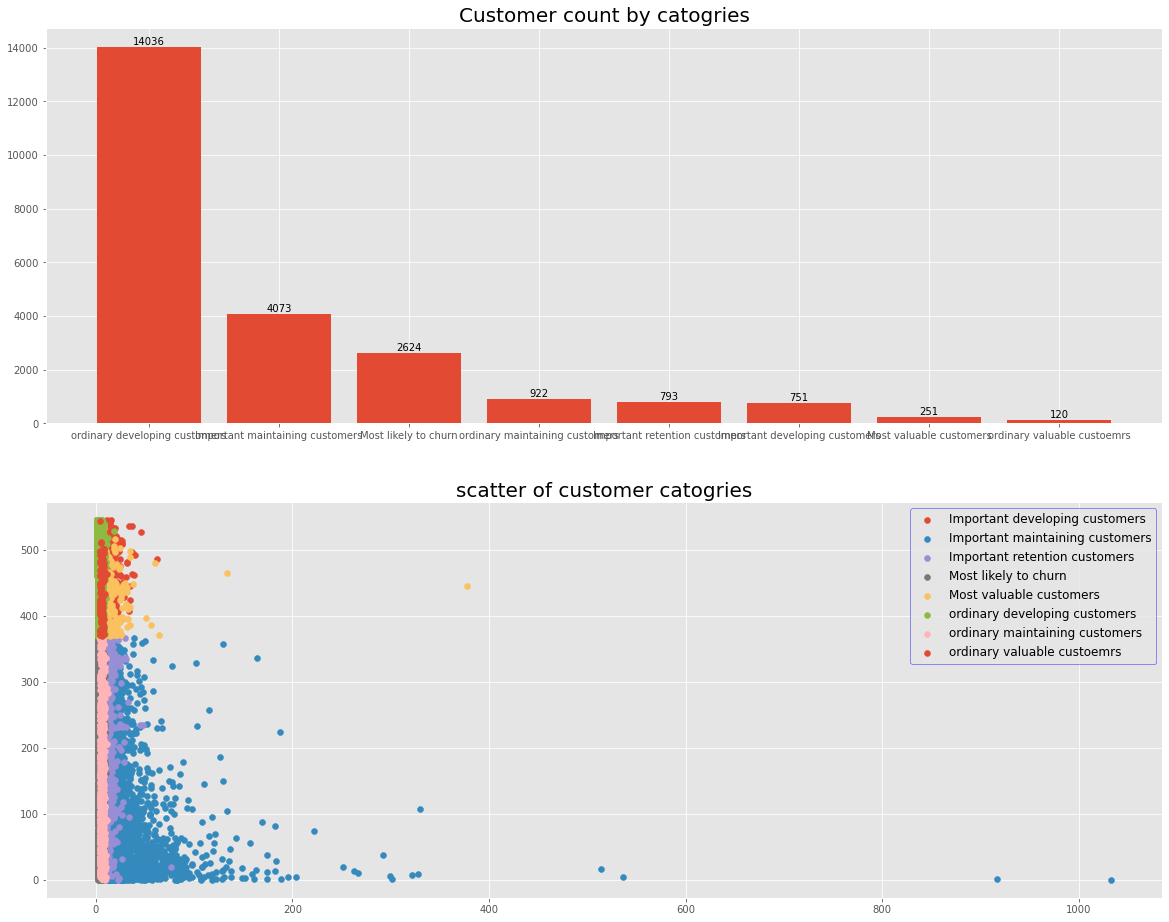

In [213]:
plt.figure(figsize=(20,16))
plt.subplot(211)
p1=plt.bar(rfm.label.value_counts().index,rfm.label.value_counts().values)
plt.bar_label(p1)
plt.title('Customer count by catogries',size=20)
# plt.figure(figsize=(16,9))
plt.subplot(212)
for label,grouped in rfm.groupby('label'):
    x=grouped['F']
    y=grouped['R']

    plt.scatter(x,y,label=label)
plt.legend(fontsize=12,frameon=True,edgecolor='blue')
plt.title('scatter of customer catogries',size=20)
plt.savefig('scatter_of_customer_catogries.jpg')
    

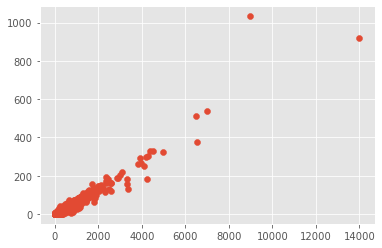

In [197]:
plt.scatter(rfm.M,rfm.F,label=rfm.label)

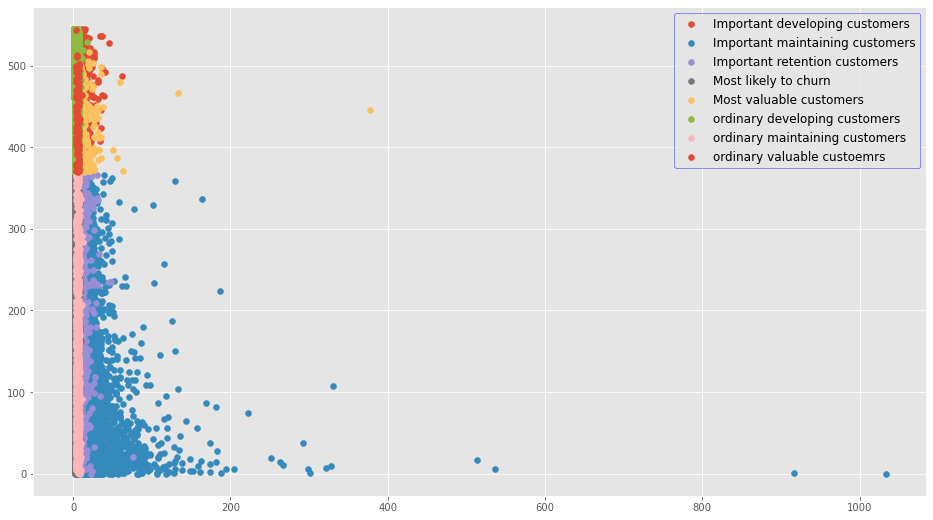

In [206]:
plt.figure(figsize=(16,9))
plt.subplot(212)
for label,grouped in rfm.groupby('label'):
    x=grouped['F']
    y=grouped['R']

    plt.scatter(x,y,label=label)
plt.legend(fontsize=12,frameon=True,edgecolor='blue')
    


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    69659 non-null  int64         
 1   date           69659 non-null  int64         
 2   number_of_cds  69659 non-null  int64         
 3   dollar_value   69659 non-null  float64       
 4   order_dt       69659 non-null  datetime64[ns]
 5   year           69659 non-null  int64         
 6   month          69659 non-null  int64         
 7   day            69659 non-null  int64         
 8   dt_month       69659 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(6)
memory usage: 4.8 MB


In [217]:
pivoted_counts=data.pivot_table(
                index='customer_id',
                columns='dt_month',
                values='order_dt',
                aggfunc='count').fillna(0)
pivoted_counts

dt_month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
customer_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## apply 函数作用于DataFrame中整列或者整行的数据，applymap是作用于DataFrame 每一个元素，map 是一个Series函数，在DataFrame 中无法使用。map函数作用于Series中的每个元素

In [219]:
df_purchase=pivoted_counts.applymap(lambda x: 1 if x>0 else 0) 
df_purchase

dt_month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
customer_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [225]:
def active_status(dat):
    status=[]
    for i in range(18):
        #本月没有消费
        if dat[i]==0:
            if len(status)==0:
                status.append('unreg')
            else: #判断上一个月的状态
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
        #本月有消费
        else:
            if len(status)==0:
                status.append('new')
            else:
                 if status[i-1] =='unactive':
                    status.append('return')
                 elif status[i-1] =='unreg':
                    status.append('new')
                 else:
                    status.append('active')
    return pd.Series(status,df_purchase.columns)
pruchase_status=df_purchase.apply(active_status,axis=1)

In [227]:
# 用Nan 替换unreg
purchase_states_ct=pruchase_status.replace('unreg',np.NaN)
purchase_states_ct

dt_month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
customer_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,NaN,NaN,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,NaN,NaN,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [230]:
purchase_states_ct=purchase_states_ct.apply(lambda x:x.value_counts())

<AxesSubplot:xlabel='dt_month'>

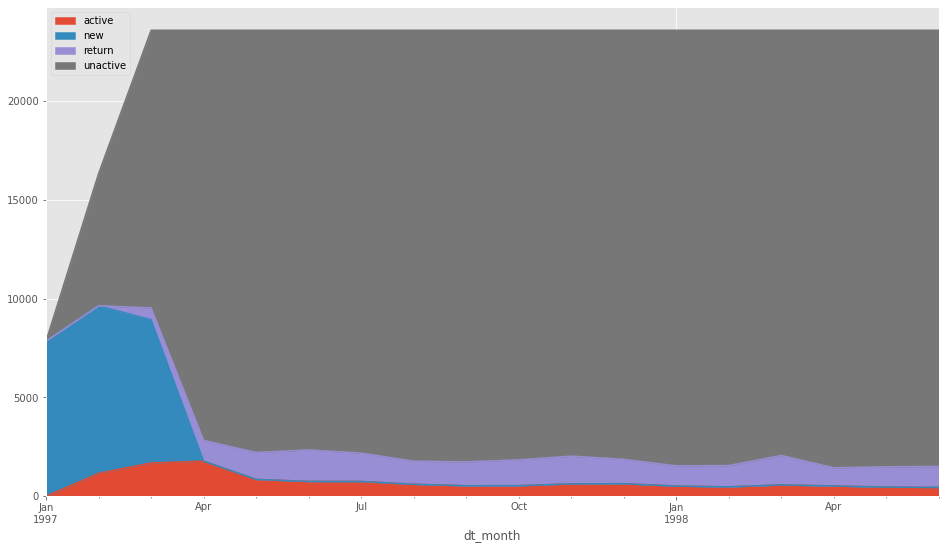

In [238]:

purchase_states_ct.T.fillna(0).plot.area(figsize=(16,9))

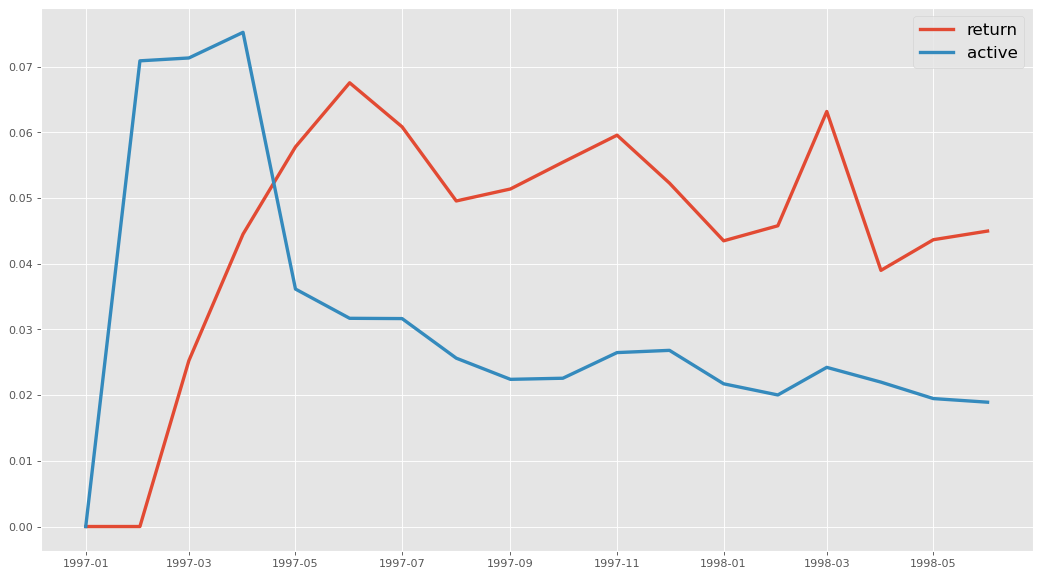

In [247]:
#回流用户的占比
rate=purchase_states_ct.T.fillna(0).apply(lambda x:x/x.sum() ,axis=1)
plt.figure(figsize=(16,9),dpi=80)
plt.plot(rate['return'],label='return',linewidth=3)
plt.plot(rate['active'],label='active',linewidth=3)
plt.legend(fontsize=15)
#monthly average avtive customers is about 5%. In the first three months, active customers increased dramaticllay.
#reasonable causes should be promotion and marketing strategies work. After april, active customer exprienced a siginifant drop.
#after half of year operation. return customers are two times of active customers.

## 用户的购买周期

### customer purchase cycle

In [250]:
#shift 将数据移动到指定位置
data1=pd.DataFrame({'a':[0,1,2,3,4,5],
                    'b':[5,4,3,2,1,0]})
data1

,a,b
0,0,5
1,1,4
2,2,3
3,3,2
4,4,1
5,5,0


In [251]:
data1.shift()

,a,b
0,NaN,NaN
1,0.0,5.0
2,1.0,4.0
3,2.0,3.0
4,3.0,2.0
5,4.0,1.0


In [252]:
#caclulate customer purchase cycle
data.head()

,customer_id,date,number_of_cds,dollar_value,order_dt,year,month,day,dt_month
0,1,19970101,1,11.77,1997-01-01,1997,1,1,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997,1,12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997,1,12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997,1,2,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997,3,30,1997-03-01


In [253]:
order_diff=data.groupby('customer_id').apply(lambda x:x.order_dt-x.order_dt.shift())
#当前订单日期减去上次订单日期

In [256]:
order_diff[:10]

customer_id   
1            0        NaT
2            1        NaT
             2     0 days
3            3        NaT
             4    87 days
             5     3 days
             6   227 days
             7    10 days
             8   184 days
4            9        NaT
Name: order_dt, dtype: timedelta64[ns]

In [257]:
order_diff.describe()

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: order_dt, dtype: object

Text(0, 0.5, 'days')

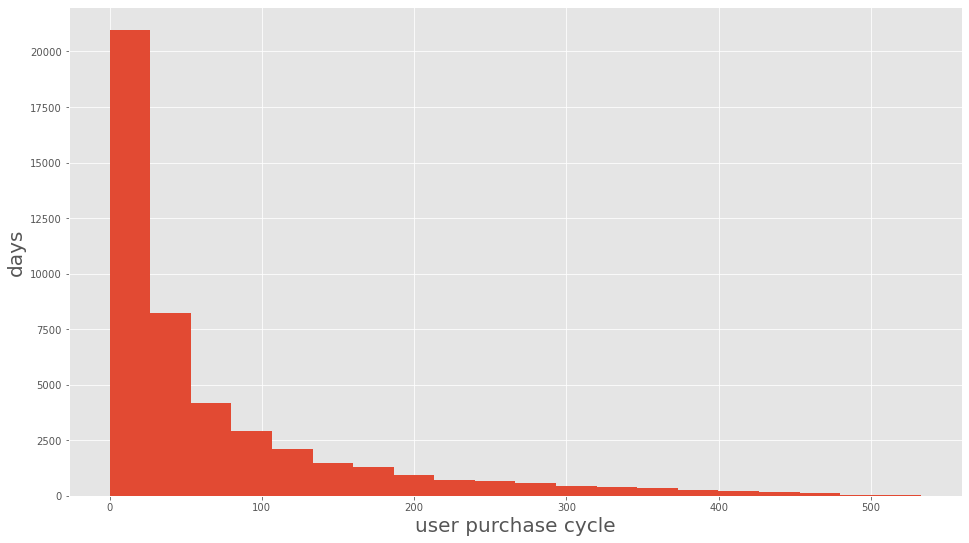

In [263]:
plt.figure(figsize=(16,9))
plt.hist(order_diff/np.timedelta64(1,'D'),bins=20)
plt.xlabel('user purchase cycle',size=20)
plt.ylabel('days',size=20)

## the average user purchase cycle is 68 days.most of customers have a purchase cycle less than 100. Only few customer will place another order after 200 days of their first order.

## 用户生命周期

In [265]:
customer_life_cycle=data.groupby('customer_id')['order_dt'].max()-data.groupby('customer_id')['order_dt'].min()

(array([13189.,   691.,   501.,   431.,   359.,   440.,   411.,   366.,
          372.,   486.,   511.,   498.,   503.,   661.,   699.,   807.,
          905.,   923.,   603.,   214.]),
 array([  0. ,  27.2,  54.4,  81.6, 108.8, 136. , 163.2, 190.4, 217.6,
        244.8, 272. , 299.2, 326.4, 353.6, 380.8, 408. , 435.2, 462.4,
        489.6, 516.8, 544. ]),
 <BarContainer object of 20 artists>)

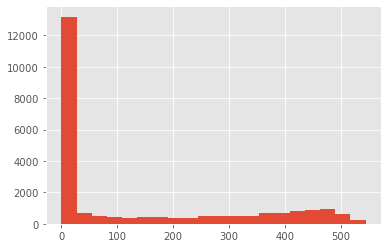

In [267]:
plt.hist(customer_life_cycle/np.timedelta64(1,'D'),bins=15)

In [270]:
user_life=data.groupby('customer_id')['order_dt'].agg(['min','max'])

In [272]:
(user_life['max']==user_life['min']).value_counts()

True     12054
False    11516
dtype: int64

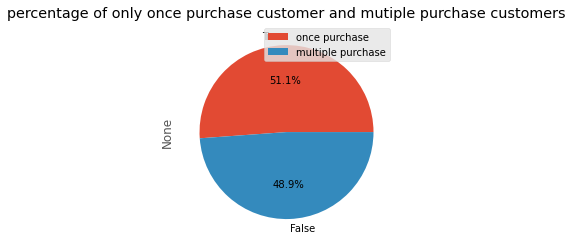

In [277]:
plt.title('percentage of only once purchase customer and mutiple purchase customers')

(user_life['max']==user_life['min']).value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(['once purchase','multiple purchase'])

customer churn is a serious issue we are facing in current stage

In [278]:
customer_life_cycle.describe()
#average user life cycle is 134 days. but the meadian is 0, it assures that most of customers only 
consumed once. 75% pertentile customers life cycle is 294, those are our loyal customers.
# becasue those data were all new customers. so this data refelct new customers life cycle. 

count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
Name: order_dt, dtype: object

Text(0.5, 0, 'life cycle')

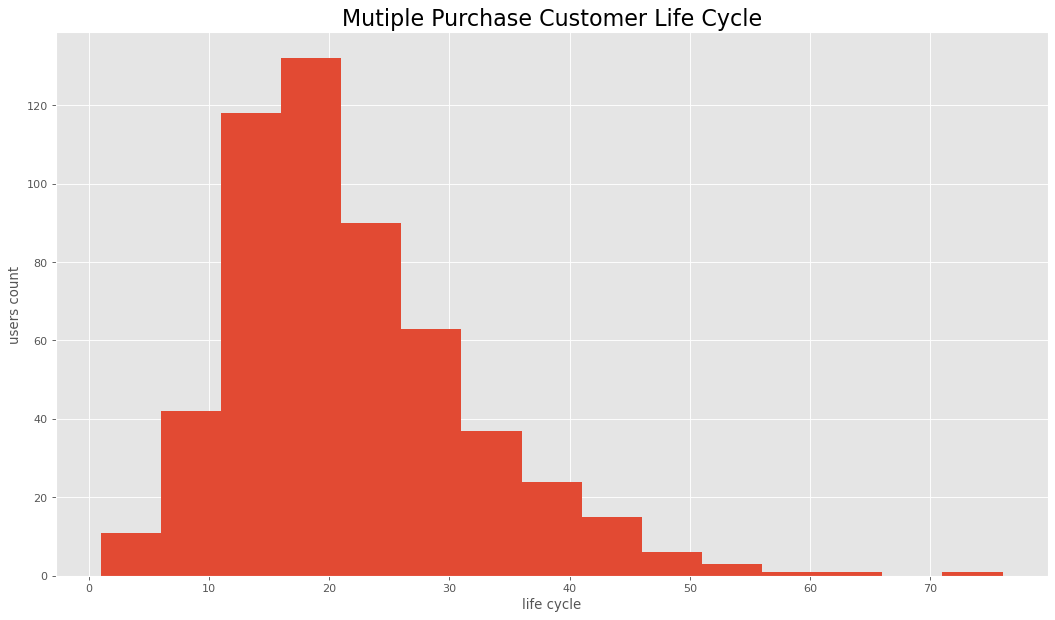

In [287]:
plt.figure(figsize=(16,9),dpi=80)
customer_life_cycle.value_counts().sort_values()[:544].hist(bins=15)
plt.title(np.char.title('mutiple purchase customer life cycle'),size=20)
plt.ylabel('users count')
plt.xlabel('life cycle')

Text(0.5, 1.0, 'Mutiple Purchase Customers Life Cycle')

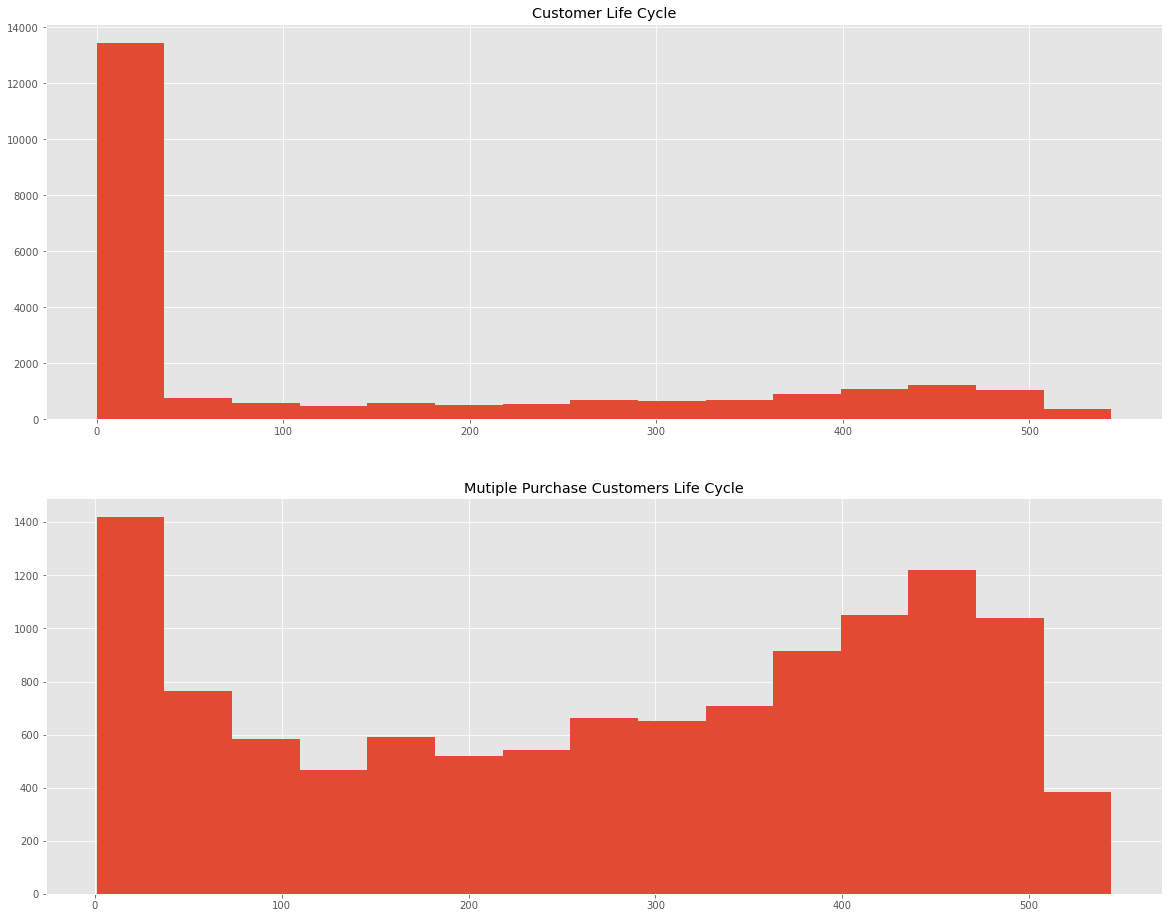

In [298]:
plt.figure(figsize=(20,16))
plt.subplot(211)
plt.hist(customer_life_cycle/np.timedelta64(1,'D'),bins=15)
plt.title(np.char.title('customer life cycle'))
plt.subplot(212)
u_1=(user_life['max']-user_life['min']).reset_index()[0]/np.timedelta64(1,'D')
u_1[u_1>0].hist(bins=15)
plt.title(np.char.title('mutiple purchase customers life cycle'))

In [293]:
(user_life['max']-user_life['min']).reset_index()[0]/

,customer_id,0
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days
...,...,...
23565,23566,0 days
23566,23567,0 days
23567,23568,28 days
23568,23569,0 days


## 复购率和回购率分析

###复购率分析

In [301]:
#多次购买的记录，消费记录》2，本月无消费
pivoted_counts.head()

dt_month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
customer_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [307]:
purchase_r=pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
purchase_r
#Nan 不参与count计数
purchase_r.sum()

dt_month
1997-01-01     844.0
1997-02-01    1178.0
1997-03-01    1479.0
1997-04-01     631.0
1997-05-01     436.0
1997-06-01     458.0
1997-07-01     469.0
1997-08-01     355.0
1997-09-01     352.0
1997-10-01     380.0
1997-11-01     410.0
1997-12-01     410.0
1998-01-01     324.0
1998-02-01     315.0
1998-03-01     473.0
1998-04-01     286.0
1998-05-01     298.0
1998-06-01     323.0
dtype: float64

In [306]:
purchase_r.count()# Nan不参与计数

dt_month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
dtype: int64

In [309]:
purchase_rate=purchase_r.sum()/purchase_r.count()

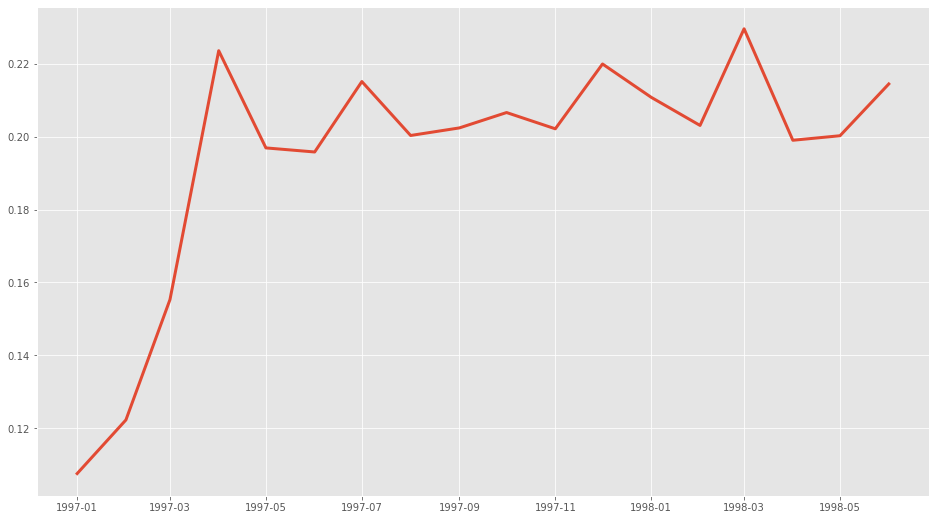

In [315]:
plt.figure(figsize=(16,9))
plt.plot(purchase_rate.index,purchase_rate.values,linewidth=3)

<AxesSubplot:xlabel='dt_month'>

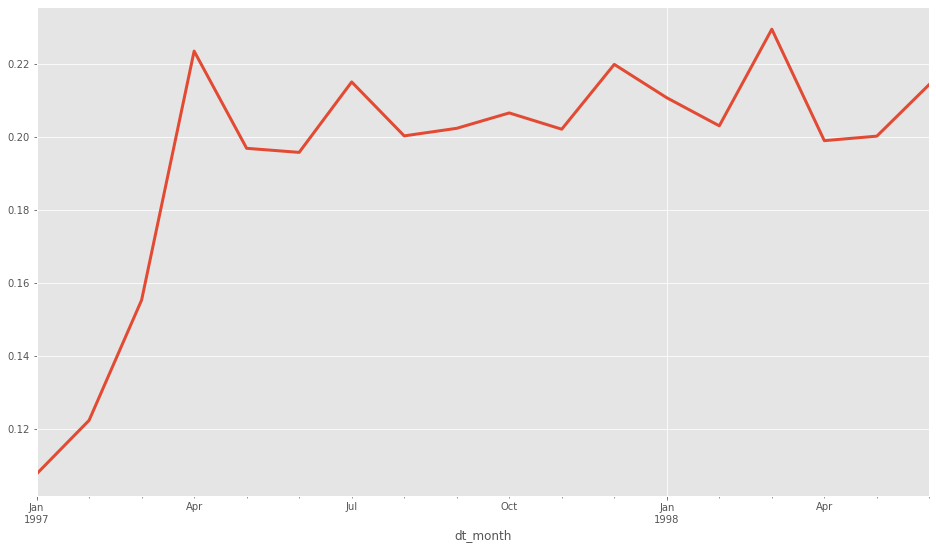

In [316]:
purchase_rate.plot(kind='line',linewidth=3,figsize=(16,9))
#first three months multple purchasing rate was low because we had many new customers

## 回购率分析

In [317]:
df_purchase

dt_month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
customer_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [323]:
def purchase_return(data):
    status=[]
    for i in range(17):
        #当前月份有消费
        # 1 回购用户，0：非回购用户 当前月消费了，下个月未消费。 NaN,当前月未消费
        if data[i]==1:
            if data[i+1]==1:
                status.append(1)
            elif data[i+1]==0:
                status.append(0)
        else: #当前月份没有消费
            status.append(np.NaN)
    status.append(np.NaN) #填充最后一列数据 为NaN
    return pd.Series(status,df_purchase.columns)
purchase_return=df_purchase.apply(purchase_return,axis=1)
purchase_return

dt_month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
customer_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


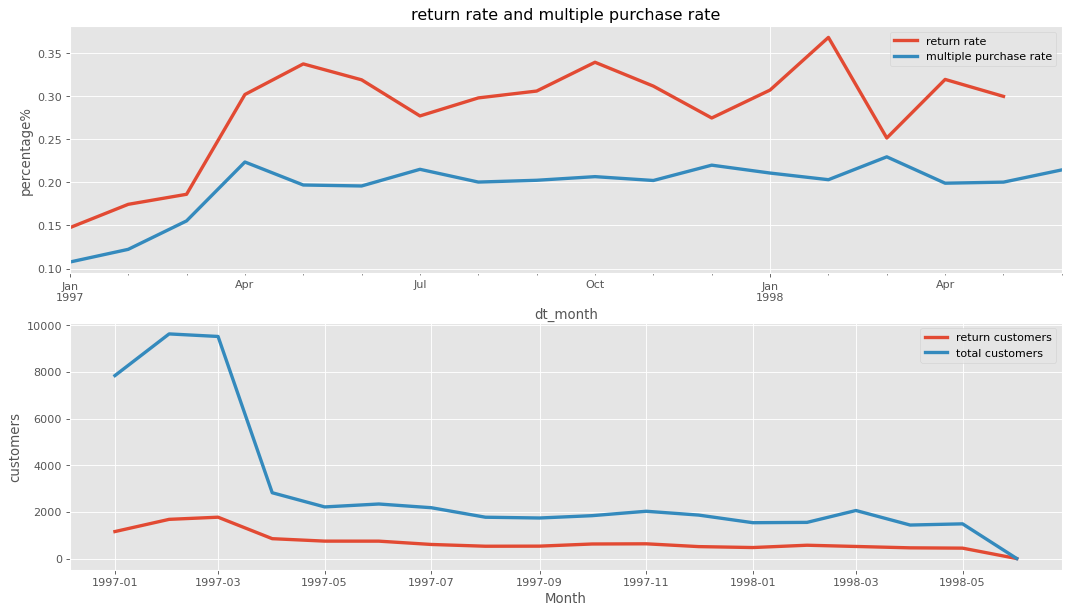

In [328]:
plt.figure(figsize=(16,9),dpi=80)
plt.subplot(211)
#回购率
(purchase_return.sum()/purchase_return.count()).plot(linewidth=3,label='return rate')
#复购率

purchase_rate.plot(kind='line',linewidth=3,figsize=(16,9),label='multiple purchase rate')
plt.legend()
plt.ylabel('percentage%')
plt.title('return rate and multiple purchase rate')
# return rate is about 30%. Mutiple purchase rate is approximate 20%

#回购人数和购物人数
plt.subplot(212)
plt.plot(purchase_return.sum(),label='return customers',linewidth=3)
plt.plot(purchase_return.count(),label='total customers',linewidth=3)
plt.xlabel('Month')
plt.ylabel('customers')
plt.legend()
#first three months total customers far more than return customers, the main reason could be many new customers placed their first order in January.
#after three month, return customer remains at 1000, total customers keep at 2000 level.